# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [7]:
df.isnull().sum()/len(df)*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
len(df[df.duplicated()])

0

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [11]:
df.drop(labels=['ID', 'Dt_Customer'], axis=1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,5,10,3,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
df['Marital_Status'] = df['Marital_Status'].replace(['Together','Married'],'relationship')

In [18]:
df['Marital_Status'] =df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [19]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [20]:
df['Total_Expenses']  = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntSweetProducts']

In [21]:
df['Total_Expenses']

0       1617
1         22
2        755
3         51
4        434
        ... 
2235    1212
2236     436
2237    1229
2238     812
2239     152
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [23]:
df['Num_Total_Purchases']  = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [24]:
df['Num_Total_Purchases']  

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [25]:
df['Kids']= df['Kidhome']+df['Teenhome']
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [26]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [27]:
df=df.drop(columns=['MntFishProducts','MntWines','MntFruits','MntMeatProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Kidhome','Teenhome'],axis=1)
dfc=df.copy()
dfc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,4/9/2012,58,0,1617,25,0,1
1,2174,1954,Graduation,Single,46344.0,8/3/2014,38,0,22,6,2,0
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,755,21,0,0
3,6182,1984,Graduation,relationship,26646.0,10/2/2014,26,0,51,8,1,0
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,434,19,1,0


In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Complain', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [29]:
from datetime import date
today = date.today().year

df['age'] = today - df['Year_Birth']

df=df.drop(columns=['Year_Birth'],axis=1)

In [30]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,5524,Graduation,Single,58138.0,4/9/2012,58,0,1617,25,0,1,66
1,2174,Graduation,Single,46344.0,8/3/2014,38,0,22,6,2,0,69
2,4141,Graduation,relationship,71613.0,21-08-2013,26,0,755,21,0,0,58
3,6182,Graduation,relationship,26646.0,10/2/2014,26,0,51,8,1,0,39
4,5324,PhD,relationship,58293.0,19-01-2014,94,0,434,19,1,0,42


In [31]:
dfc = df.copy()

### 13. Encode the categorical variables in the dataset

In [32]:
object_type_variables = [i for i in df.columns if df.dtypes[i]== object]
object_type_variables


['Education', 'Marital_Status', 'Dt_Customer']

In [33]:
categorical_columns = ['Education', 'Marital_Status']
le = LabelEncoder()
for i in categorical_columns:
        df[i] = df[[i]].apply(le.fit_transform)

In [34]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,5524,2,0,58138.0,4/9/2012,58,0,1617,25,0,1,66
1,2174,2,0,46344.0,8/3/2014,38,0,22,6,2,0,69
2,4141,2,1,71613.0,21-08-2013,26,0,755,21,0,0,58
3,6182,2,1,26646.0,10/2/2014,26,0,51,8,1,0,39
4,5324,4,1,58293.0,19-01-2014,94,0,434,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [42]:
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Drop non-numeric columns from DataFrame
df_numeric = df.drop(non_numeric_columns, axis=1)

# Scale the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric.values)
scaled_features_df = pd.DataFrame(scaled_features, columns=df_numeric.columns)

# Concatenate the scaled numeric features with the non-numeric columns
df_scaled = pd.concat([df[non_numeric_columns], scaled_features_df], axis=1)


In [43]:
scaled_features_df.head()

,ID,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.020999,-0.350141,-1.346874,0.235327,0.307039,-0.097282,1.707879,1.320826,-1.264505,0.621248,0.985345
1,-1.053058,-0.350141,-1.346874,-0.235826,-0.383664,-0.097282,-0.941577,-1.154596,1.396361,-0.501912,1.235733
2,-0.447070,-0.350141,0.742460,0.773633,-0.798086,-0.097282,0.276010,0.799685,-1.264505,-0.501912,0.317643
3,0.181716,-0.350141,0.742460,-1.022732,-0.798086,-0.097282,-0.893405,-0.894025,0.065928,-0.501912,-1.268149
4,-0.082614,1.428354,0.742460,0.241519,1.550305,-0.097282,-0.257204,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [44]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00044663e+00 -3.84114609e-03  1.89383575e-02  1.30418192e-02
  -4.65448809e-02  3.38981712e-02 -1.74243476e-02 -2.38449472e-02
  -1.45948170e-04 -3.69007040e-02 -2.76368349e-05]
 [-3.84114609e-03  1.00044663e+00 -1.37540339e-02  1.20027297e-01
  -1.17336854e-02 -5.05625191e-02  9.31711902e-02  9.40543885e-02
   5.32130438e-02  6.32789156e-02  1.71466853e-01]
 [ 1.89383575e-02 -1.37540339e-02  1.00044663e+00  4.63846975e-03
  -4.50971948e-03 -5.20465543e-03 -1.65561296e-02  6.71036864e-03
   3.91759832e-02 -6.00420555e-02 -4.23840181e-03]
 [ 1.30418192e-02  1.20027297e-01  4.63846975e-03  1.00044663e+00
  -3.94826239e-03 -2.72352757e-02  6.67126187e-01  5.63621397e-01
  -2.90841549e-01  2.87174434e-01  1.61013782e-01]
 [-4.65448809e-02 -1.17336854e-02 -4.50971948e-03 -3.94826239e-03
   1.00044663e+00  1.32369878e-02  2.05532216e-02  5.74294350e-03
   1.80614498e-02 -8.90020337e-02  1.98799637e-02]
 [ 3.38981712e-02 -5.05625191e-02 -5.20465543e-03 -2.72352757e-02

In [45]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 0.01557624  0.00329953 -0.04778848 -0.0049021  -0.02693109  0.13151683
  -0.06773381 -0.66278983 -0.69441858  0.23045872 -0.01449653]
 [-0.09727204  0.01391491 -0.04553586 -0.54310494  0.06662401 -0.27980269
  -0.67912026 -0.05506971 -0.05717452 -0.37809563 -0.01083972]
 [ 0.02108227  0.00186238 -0.00629716 -0.07768319  0.10838923  0.1138724
  -0.20075264  0.34869582 -0.19240627  0.35774143  0.80116982]
 [-0.47170867  0.18733787  0.80162509 -0.1107666  -0.21909248 -0.13527666
   0.09597946 -0.03161507 -0.03215293  0.08803678  0.04718343]
 [ 0.01191107  0.04034537  0.01171834 -0.1222641   0.01132925  0.2291591
  -0.28793103 -0.43528103  0.64853957  0.48727846  0.0091965 ]
 [ 0.03341184 -0.0045949   0.00558762 -0.02569811 -0.00799095 -0.11742236
  -0.27295968  0.44871116 -0.21655751  0.5867834  -0.563257  ]
 [-0.55342279 -0.80894969 -0.16040364  0.05001681 -0.04792788 -0.04783433
   0.00899097 -0.02067287  0.02854646  0.0689872   0.02061695]
 [-0.4786508   0.4776996  

In [46]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [25.658790001739874, 11.42288921566896, 9.610717369348757, 9.54715073354164, 9.226302285507373, 8.604387565088812, 7.610245014914082, 6.502960468806486, 6.251254423927734, 4.022797553192585, 1.5425053682637084]
Cummulative Variance Explained:  [ 25.65879     37.08167922  46.69239659  56.23954732  65.46584961
  74.07023717  81.68048219  88.18344265  94.43469708  98.45749463
 100.        ]


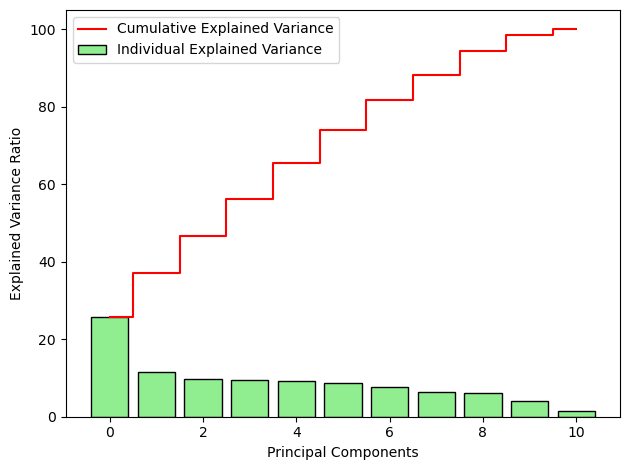

In [51]:

n_columns = len(var_exp)

plt.bar(range(n_columns), var_exp, align='center', color='lightgreen', edgecolor='black', label='Individual Explained Variance')
plt.step(range(n_columns), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.legend(loc='best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [52]:
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.414112,-0.158351,-0.530668,-0.016517,1.113418,-0.591133,0.832799,0.117799
1,-1.659951,1.028547,-0.688903,-0.902890,1.183419,0.510248,1.319615,0.350576
2,1.158092,-0.281059,0.253115,0.215010,-0.763878,0.668972,0.755922,-0.948959
3,-1.770481,-1.120908,0.672053,-0.225350,-0.758037,0.337904,-0.328610,-0.383980
4,0.040384,0.585690,-0.933625,0.534854,-0.882041,-0.623066,-1.703973,-0.739890


In [53]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(pca_df)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,21728.400270
1,2,16971.045171
2,3,15557.671316
3,4,13531.394881
4,5,12245.230364
5,6,11351.135791
6,7,10618.573106
7,8,10189.613613
8,9,9769.083625
9,10,9415.902505


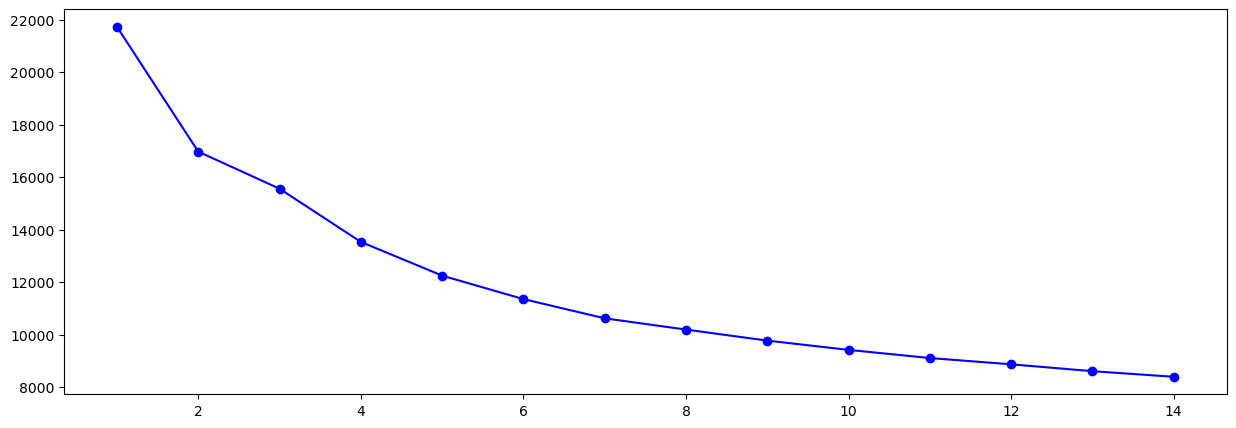

In [54]:

cluster_df = pd.DataFrame({'num_clusters' :cluster_range,'cluster_errors':cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [55]:
kmeans= KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [56]:
###creating a dataframe of datalabels
label = pd.DataFrame(kmeans.labels_, columns=['Labels'])

In [58]:
###joining the label dataframe to the pca_df dataframe.
kMeans_df = pca_df.join(label)
kMeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,2.414112,-0.158351,-0.530668,-0.016517,1.113418,-0.591133,0.832799,0.117799,1
1,-1.659951,1.028547,-0.688903,-0.902890,1.183419,0.510248,1.319615,0.350576,0
2,1.158092,-0.281059,0.253115,0.215010,-0.763878,0.668972,0.755922,-0.948959,1
3,-1.770481,-1.120908,0.672053,-0.225350,-0.758037,0.337904,-0.328610,-0.383980,0
4,0.040384,0.585690,-0.933625,0.534854,-0.882041,-0.623066,-1.703973,-0.739890,0


In [59]:
kMeans_df['Labels'].value_counts()

0    1243
1     976
2      21
Name: Labels, dtype: int64

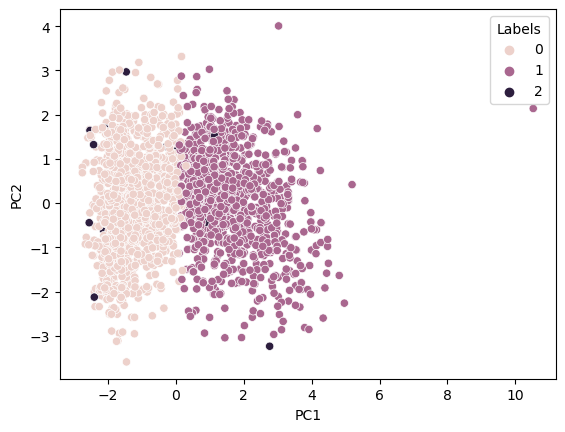

In [64]:
sns.scatterplot(x='PC1', y='PC2', hue='Labels', data=kMeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

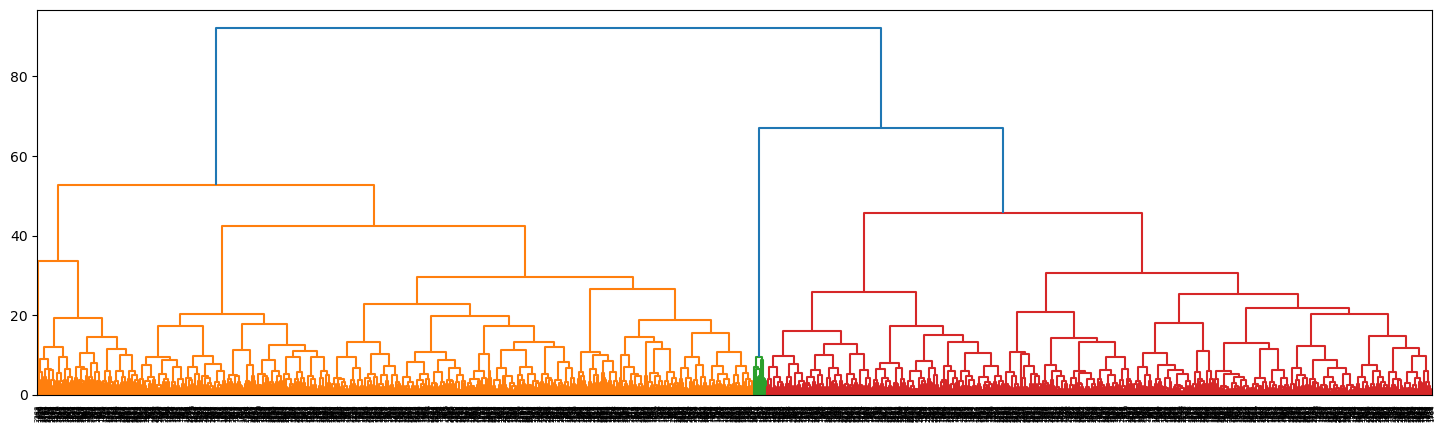

In [65]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel=('Datapoints')
plt.ylabel=('Euclidean distance')
plt.show()

In [66]:
from sklearn.metrics import silhouette_score

In [70]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,label))

2 0.20878050922533756
3 0.20878050922533756
4 0.20878050922533756
5 0.20878050922533756
6 0.20878050922533756
7 0.20878050922533756
8 0.20878050922533756
9 0.20878050922533756
10 0.20878050922533756
11 0.20878050922533756
12 0.20878050922533756
13 0.20878050922533756
14 0.20878050922533756


In [71]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hie_cluster_model = hie_cluster.fit(scaled_features_df)


In [72]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [73]:
df_hier = df.join(df_label1)
df_hier.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Labels
0,5524,2,0,58138.0,4/9/2012,58,0,1617,25,0,1,66,0
1,2174,2,0,46344.0,8/3/2014,38,0,22,6,2,0,69,1
2,4141,2,1,71613.0,21-08-2013,26,0,755,21,0,0,58,0
3,6182,2,1,26646.0,10/2/2014,26,0,51,8,1,0,39,1
4,5324,4,1,58293.0,19-01-2014,94,0,434,19,1,0,42,0


### Visualization and Interpretation of results

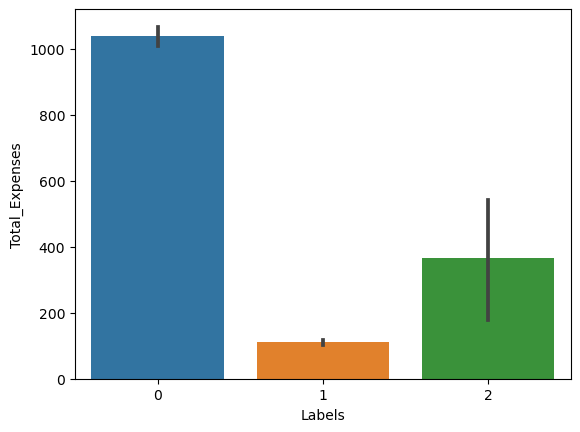

In [76]:
sns.barplot(x='Labels', y='Total_Expenses', data=df_hier)
plt.show()


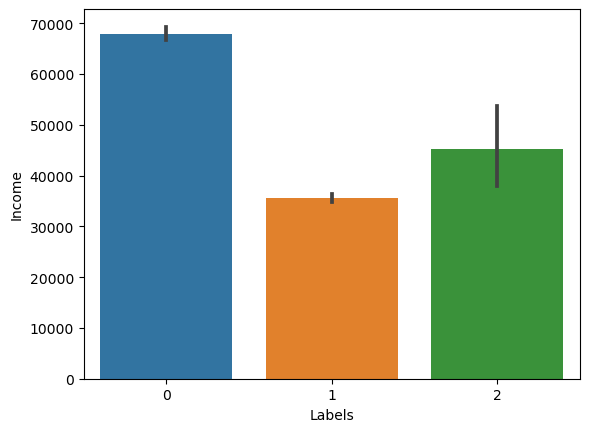

In [79]:
sns.barplot(x='Labels', y='Income', data=df_hier)
plt.show()


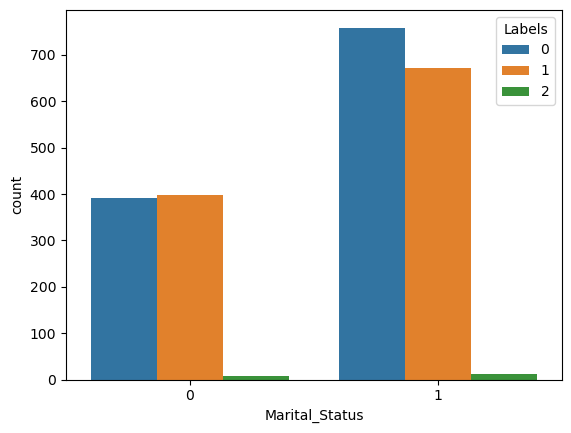

In [84]:
sns.countplot(x='Marital_Status', hue='Labels', data=df_hier)
plt.show()


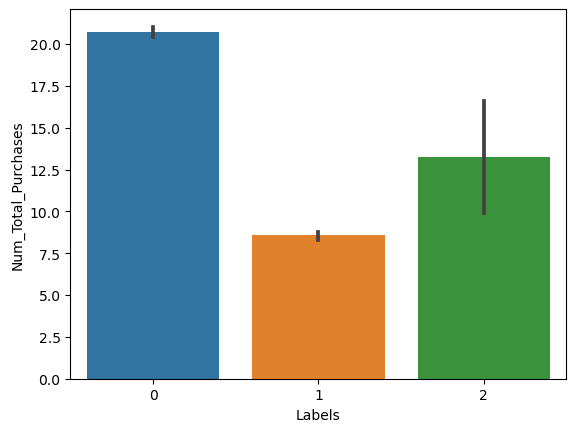

In [86]:
sns.barplot(x='Labels', y='Num_Total_Purchases', data=df_hier)
plt.show()

-----
## Happy Learning
-----